# **`heatmap()`**

## **Introdução**

Neste notebook iremos discorrer sobre a função `heatmap()`, que retorna o objeto `Axes` do matplotlib contendo um mapa de calor sobre os dados inseridos.

Inicialmente criaremos um array contendo valores aleatórios apenas para ilustrar a função, e depois importaremos um `DataFrame` para fazer um gráfico de calor, discutindo os detalhes para essa tipagem.

In [6]:
from numpy.random import seed, rand

seed(0)

dados = rand(5,8)

dados

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492, 0.56804456,
        0.92559664, 0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985, 0.77815675, 0.87001215, 0.97861834,
        0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329, 0.94466892, 0.52184832,
        0.41466194, 0.26455561, 0.77423369],
       [0.45615033, 0.56843395, 0.0187898 , 0.6176355 , 0.61209572,
        0.616934  , 0.94374808, 0.6818203 ]])

# **Parâmetro Fundamental**

Importamos a função `heatmap()` com a seguinte linha:

In [7]:
from seaborn import heatmap

Tanto para um `DataFrame` quanto um `array` 2D, o único parâmetro obrigatório para a realização de um mapa de calor é o `data`. Para um array, basta inserí-lo que a função realizará o gráfico.

<AxesSubplot: >

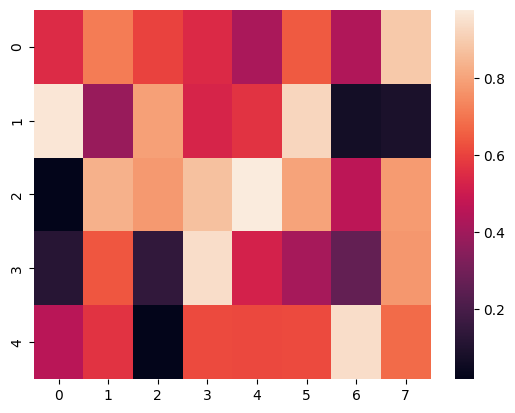

In [8]:
heatmap(dados)

Já para um DataFrame, precisamos utilizar um método chamado `pivot()`, que transforma o objeto num DataFrame, sendo o primeiro parâmetro desse método os índices, seguido de outra que será as colunas, e por fim os valores que popularão as células.

In [9]:
from seaborn import load_dataset

df = load_dataset('flights')

tabela = df.pivot(index = 'month', columns = 'year', values = 'passengers')

tabela.sample(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jan,112,115,145,171,196,204,242,284,315,340,360,417
May,121,125,172,183,229,234,270,318,355,363,420,472
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461


Agora que temos em mãos a tabela com os eixos bem definidos, podemos executar a nossa função.

<AxesSubplot: xlabel='year', ylabel='month'>

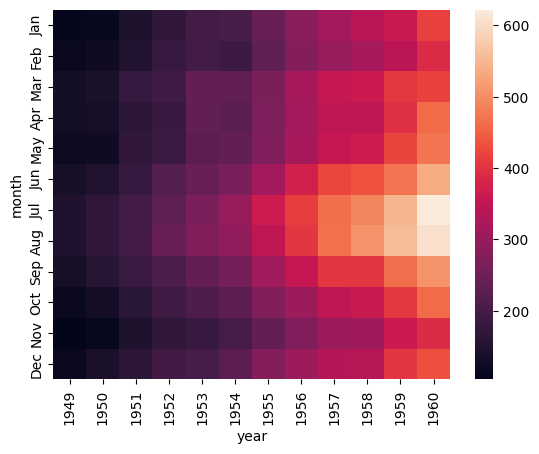

In [10]:
heatmap(tabela)

Note que o método `pivot()` retorna um erro se tivermos uma mesma célula com dois valores distintos. Vou pegar o exemplo da [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

In [12]:
from pandas import DataFrame

dicionario = {"foo": ['one', 'one', 'two', 'two'],
              "bar": ['A', 'A', 'B', 'C'],
              "baz": [1, 2, 3, 4]}

dff = DataFrame(dicionario)

dff

,foo,bar,baz
0,one,A,1
1,one,A,2
2,two,B,3
3,two,C,4


Como o computador não sabe se "ponto" cujas coordenadas são (one,A) deve ser populado pelo valor 1 ou 2, então ele retorna um erro:

In [13]:
dff.pivot(index = 'foo', columns = 'bar', values = 'baz')

ValueError: Index contains duplicate entries, cannot reshape

## **Parâmetros Adicionais**

Se quisermos saber o valor numérico em cada célula, acrescentamos o parâmetro `annot` configurado como `True`.

<AxesSubplot: xlabel='year', ylabel='month'>

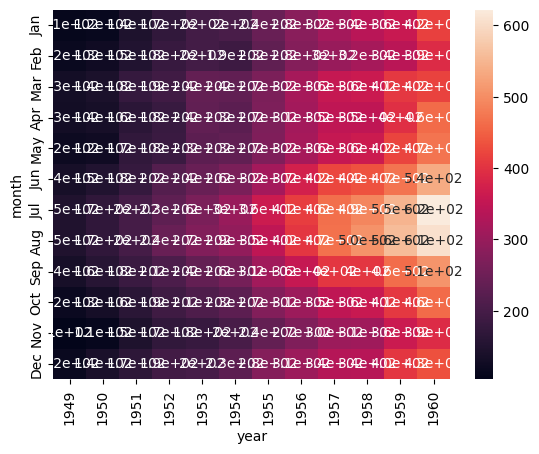

In [11]:
heatmap(tabela, annot = True)